In [ ]:
from google.colab import drive
from zipfile import ZipFile
import csv
import os
import numpy as np
import h5py
import skimage.io
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

random.seed(5218)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Preparing dataset (CK+)

1


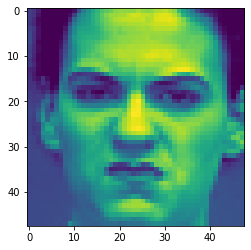

In [ ]:
with ZipFile('/content/drive/MyDrive/Datasets/CK+.zip') as zipObj:
  zipObj.extractall('/content/CK+')

ck_path = 'CK+'

anger_path = os.path.join(ck_path, 'anger')
disgust_path = os.path.join(ck_path, 'disgust')
fear_path = os.path.join(ck_path, 'fear')
happy_path = os.path.join(ck_path, 'happy')
sadness_path = os.path.join(ck_path, 'sadness')
surprise_path = os.path.join(ck_path, 'surprise')
contempt_path = os.path.join(ck_path, 'contempt')

data_x = []
data_y = []

# datapath = os.path.join('data','CK_data.h5')
if not os.path.exists(os.path.dirname(datapath)):
    os.makedirs(os.path.dirname(datapath))

files = os.listdir(anger_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(anger_path,filename))
    data_x.append(I.tolist())
    data_y.append(0)

files = os.listdir(disgust_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(disgust_path,filename))
    data_x.append(I.tolist())
    data_y.append(1)

files = os.listdir(fear_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(fear_path,filename))
    data_x.append(I.tolist())
    data_y.append(2)

files = os.listdir(happy_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(happy_path,filename))
    data_x.append(I.tolist())
    data_y.append(3)

files = os.listdir(sadness_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(sadness_path,filename))
    data_x.append(I.tolist())
    data_y.append(4)

files = os.listdir(surprise_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(surprise_path,filename))
    data_x.append(I.tolist())
    data_y.append(5)

files = os.listdir(contempt_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(contempt_path,filename))
    data_x.append(I.tolist())
    data_y.append(6)

# print(np.shape(data_x))
# print(np.shape(data_y))

data_x, data_y = shuffle(data_x, data_y, random_state=0)
img_index = random.randint(0, np.shape(data_x)[0])
plt.imshow(data_x[img_index])
print(data_y[img_index])


Defining Hyperparameters

In [ ]:
input_size = np.shape(data_x)[1] 
dataset_size = np.shape(data_x)[0]
train_size = int(dataset_size * 0.8)
train_x = data_x[0:train_size]
train_y = data_y[0:train_size]

test_size = int(dataset_size * 0.1)
test_x = data_x[train_size: dataset_size]
test_y = data_y[train_size: dataset_size]

test_x = data_x[train_size:train_size + test_size]
test_y = data_y[train_size:train_size + test_size]

val_x = data_x[train_size + test_size: dataset_size]
val_y = data_y[train_size + test_size: dataset_size]

epochs = 10

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 10,
    shear_range = 10, 
    zoom_range = 0.1,
    fill_mode = 'reflect',
    horizontal_flip = True)

print(input_size)
print(np.shape(train_x))
print(np.shape(test_x))
print(np.shape(val_x))

AttributeError: ignored

In [ ]:
def Model1(input_size, train_x, train_y, epochs, test_x, test_y, loss_func="S"):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), input_shape=(input_size, input_size, 1), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(units=128, activation='relu'))
  model.add(layers.Dense(units=128, activation='sigmoid'))

  if loss_func == "C":
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
  elif loss_func == "S":
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

  model.compile(optimizer='adam',
                loss=loss,
                metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epochs, validation_data=(test_x, test_y))
  return model, history

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 11s 55ms/step - loss: 11.7926 - accuracy: 0.3138 - val_loss: 1.2403 - val_accuracy: 0.6224
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 0.7426 - accuracy: 0.7309 - val_loss: 0.4325 - val_accuracy: 0.8673
Epoch 3/10
25/25 [==============================] - 0s 6ms/step - loss: 0.3142 - accuracy: 0.9171 - val_loss: 0.2382 - val_accuracy: 0.9490
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 0.1444 - accuracy: 0.9643 - val_loss: 0.1371 - val_accuracy: 0.9796
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 0.1084 - accuracy: 0.9668 - val_loss: 0.0790 - val_accuracy: 0.9796
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0449 - accuracy: 0.9936 - val_loss: 0.1027 - val_accuracy: 0.9796
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0353 - accuracy: 0.9936 - val_loss: 0.0778 - val_accuracy: 0.9898
Epoch 8/10
25/25 [==========

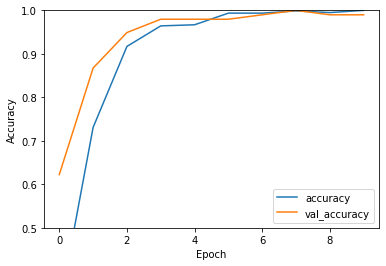

In [ ]:
loss = "S"
model, history = Model1(input_size, train_x, train_y, epochs, test_x, test_y, loss)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(val_x, val_y, verbose=2)
print(test_loss, test_acc)

In [ ]:
with ZipFile('/content/drive/MyDrive/Datasets/fer2013.csv.zip') as zipObj:
  zipObj.extractall('/content/FER2013')

def load_data(dataset_path):
  
  #classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprsie', 'Neutral']  #We will be dealing with seven different types of emotions.

  data = []
  test_data = []
  test_labels = []
  labels =[]

  with open(dataset_path, 'r') as file:
      for line_no, line in enumerate(file.readlines()):
          if 0 < line_no <= 35887:
            curr_class, line, set_type = line.split(',')
            image_data = np.asarray([int(x) for x in line.split()]).reshape(48, 48)#Creating a list out of the string then converting it into a 2-Dimensional numpy array.
            image_data =image_data.astype(np.uint8)/255.0
            
            if (set_type.strip() == 'PrivateTest'):
              
              test_data.append(image_data)
              test_labels.append(curr_class)
            else:
              data.append(image_data)
              labels.append(curr_class)
      
      test_data = np.expand_dims(test_data, -1)
      test_labels = tf.keras.utils.to_categorical(test_labels, num_classes = 7)
      data = np.expand_dims(data, -1)   
      labels = tf.keras.utils.to_categorical(labels, num_classes = 7)
    
      return np.array(data), np.array(labels), np.array(test_data), np.array(test_labels)

dataset_path = "/content/FER2013/fer2013.csv" 
train_data, train_labels, test_data, test_labels = load_data(dataset_path)
#train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = test_size,random_state = seed)

print("Number of images in Training set:", len(train_data))
print("Number of images in Test set:", len(test_data))

Number of images in Training set: 32298
Number of images in Test set: 3589


In [ ]:
def Model1(input_size, train_x, train_y, epochs, test_x, test_y, loss_func="S"):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
    model.add(layers.Dropout(0.5))
      
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.5))
      
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.5))
      
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.5))
      
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(7, activation='softmax'))

    if loss_func == "C":
      loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    elif loss_func == "S":
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    model.compile(optimizer='adam',
                  loss=loss,
                  metrics=['accuracy'])
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    history = model.fit(train_x, train_y, epochs=epochs, validation_data=(test_x, test_y), callbacks=[early_stopping])
    return model, history

In [ ]:
epochs = 100
loss_func = "C"
model, history = Model1(input_size, train_data, train_labels, epochs, test_data, test_labels, loss_func)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1010/1010 [==============================] - 36s 24ms/step - loss: 2.0085 - accuracy: 0.2171 - val_loss: 1.8448 - val_accuracy: 0.2449
Epoch 2/100
1010/1010 [==============================] - 24s 23ms/step - loss: 1.8437 - accuracy: 0.2479 - val_loss: 1.8352 - val_accuracy: 0.2449
Epoch 3/100
1010/1010 [==============================] - 24s 23ms/step - loss: 1.8252 - accuracy: 0.2498 - val_loss: 1.8167 - val_accuracy: 0.2449
Epoch 4/100
1010/1010 [==============================] - 24s 23ms/step - loss: 1.8170 - accuracy: 0.2496 - val_loss: 1.8119 - val_accuracy: 0.2449
Epoch 5/100
1010/1010 [==============================] - 24s 23ms/step - loss: 1.8092 - accuracy: 0.2498 - val_loss: 1.7978 - val_accuracy: 0.2449
Epoch 6/100
1010/1010 [==============================] - 24s 23ms/step - loss: 1.8061 - accuracy: 0.2494 - val_loss: 1.8715 - val_accuracy: 0.2446
Epoch 7/100
1010/1010 [==============================] - 24s 24ms/step - loss: 1.7827 - accuracy: 0.2643 - val_loss: 1.8365 - val_

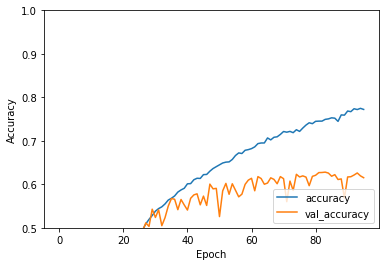

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
from skimage.transform import resize
from tensorflow.python.lib.io import file_io
import pandas as pd

train_dataset	= '/content/FER2013Sep/fer2013_train.csv'
eval_dataset 	= '/content/FER2013Sep/fer2013_eval.csv'

img_height, img_width = 139, 139

with ZipFile('/content/drive/MyDrive/Datasets/fer2013sep.zip') as zipObj:
  zipObj.extractall('/content/FER2013Sep')

def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

def get_data(dataset):
    file_stream = file_io.FileIO(dataset, mode='r')
    data = pd.read_csv(file_stream)
    pixels = data['pixels'].tolist()
    images = np.empty((len(data), img_height, img_width, 3))
    i = 0

    for pixel_sequence in pixels:
        single_image = [float(pixel) for pixel in pixel_sequence.split(' ')]  
        single_image = np.asarray(single_image).reshape(48, 48) 
        single_image = resize(single_image, (img_height, img_width), order = 3, mode = 'constant') 
        ret = np.empty((img_height, img_width, 3))  
        ret[:, :, 0] = single_image
        ret[:, :, 1] = single_image
        ret[:, :, 2] = single_image
        images[i, :, :, :] = ret
        i += 1
    
    images = preprocess_input(images)
    labels = tf.keras.utils.to_categorical(data['emotion'])

    return images, labels    

train_data_x, train_data_y  = get_data(train_dataset)
val_data  = get_data(eval_dataset)




In [ ]:
base_model = tf.keras.applications.inception_v3.InceptionV3(
    include_top = False,
    weights     = 'imagenet',
    input_shape = (img_height, img_width, 3))

output = base_model.output

x = layers.GlobalAveragePooling2D()(output)
x = layers.Dense(1024, activation = 'relu')(x)
predictions = layers.Dense(7, activation = 'softmax')(x)

model = tf.keras.models.Model(inputs = base_model.input, outputs = predictions)
model.summary()

for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(lr = 1e-3, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.0), 
    loss        = 'categorical_crossentropy', 
    metrics     = ['accuracy'])


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 139, 139, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 69, 69, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 69, 69, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(train_data_x, train_data_y, epochs=5, validation_data=val_data)